**Task 0- Warm Up**

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

data = pd.read_csv("iris_clusters.csv", delimiter=";")
data = data.drop(columns=['id'])
print(data.head())

Saving iris_clusters.csv to iris_clusters.csv
    pl   pw   sl   sw
0  6.7  3.0  4.6  1.5
1  6.7  2.8  4.6  1.2
2  5.0  3.6  1.6  0.5
3  6.3  3.1  5.9  2.5
4  7.0  2.9  5.7  1.7


**Task 1- K-Means Clustering**

Cluster labels (first 20): [1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0]
Cluster centroids:
 [[ 4.9490566   3.3754717   1.46226415  0.31037736]
 [ 6.20829016  2.81813472  4.91865285  1.72797927]
 [50.          3.7         1.6         0.5       ]]
Corresponds (more or less) to the three expected species? YES
Number of records in each cluster:
Cluster 1: 106 records
Cluster 2: 193 records
Cluster 3: 1 records

Cluster centroids (coordinates):
 [[ 4.9490566   3.3754717   1.46226415  0.31037736]
 [ 6.20829016  2.81813472  4.91865285  1.72797927]
 [50.          3.7         1.6         0.5       ]]


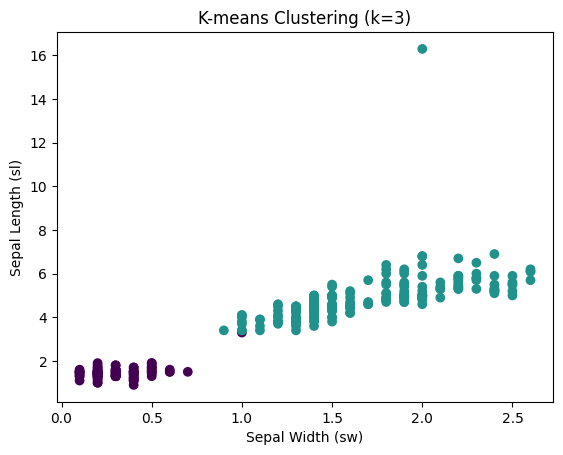

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)


print("Cluster labels (first 20):", kmeans.labels_[:20])
print("Cluster centroids:\n", kmeans.cluster_centers_)

data["Cluster"] = kmeans.labels_

# Show cluster sizes
cluster_counts = data["Cluster"].value_counts().sort_index()

print("Corresponds (more or less) to the three expected species? YES")  # -> or NO after you inspect the plot
print("Number of records in each cluster:")
for i, count in cluster_counts.items():
    print(f"Cluster {i+1}: {count} records")

print("\nCluster centroids (coordinates):\n", kmeans.cluster_centers_)
plt.scatter(data["sw"], data["sl"], c=data["Cluster"], cmap="viridis")
plt.xlabel("Sepal Width (sw)")
plt.ylabel("Sepal Length (sl)")
plt.title("K-means Clustering (k=3)")
plt.show()

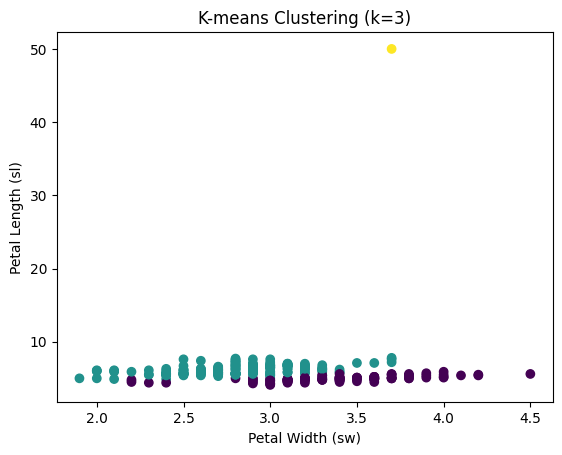

In [ ]:
plt.scatter(data["pw"], data["pl"], c=data["Cluster"], cmap="viridis")
plt.xlabel("Petal Width (sw)")
plt.ylabel("Petal Length (sl)")
plt.title("K-means Clustering (k=3)")
plt.show()

**Task 2 - K- Means Clustering**

In [ ]:
#Scale first---> Outlier removal
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor

data = pd.read_csv("iris_clusters.csv", delimiter=";")
data = data.drop(columns=['id'])
print(data.head())

scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


    pl   pw   sl   sw
0  6.7  3.0  4.6  1.5
1  6.7  2.8  4.6  1.2
2  5.0  3.6  1.6  0.5
3  6.3  3.1  5.9  2.5
4  7.0  2.9  5.7  1.7


In [ ]:
lof = LocalOutlierFactor(n_neighbors=10)
mask = lof.fit_predict(scaled)
filtered = scaled[mask == 1]


In [ ]:
kmeans_A = KMeans(n_clusters=3, random_state=42)
kmeans_A.fit(filtered)
filtered["Cluster"] = kmeans_A.labels_

/tmp/ipython-input-2118961151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["Cluster"] = kmeans_A.labels_


In [ ]:
print("Case A: Scale first, then remove outliers")
print("Number of records in each cluster:")
print(filtered["Cluster"].value_counts().sort_index())

print("\nCluster centroids:")
print(pd.DataFrame(kmeans_A.cluster_centers_, columns=data.columns))

Case A: Scale first, then remove outliers
Number of records in each cluster:
Cluster
0     92
1    100
2     93
Name: count, dtype: int64

Cluster centroids:
         pl        pw        sl        sw
0  0.040471  0.300167  0.220144  0.502609
1  0.018715  0.582308  0.035584  0.079200
2  0.049500  0.390819  0.287739  0.783226


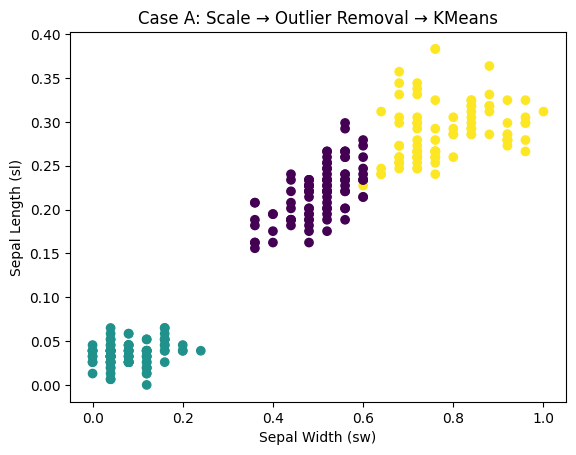

In [ ]:
plt.scatter(filtered["sw"], filtered["sl"], c=filtered["Cluster"], cmap="viridis")
plt.xlabel("Sepal Width (sw)")
plt.ylabel("Sepal Length (sl)")
plt.title("Case A: Scale → Outlier Removal → KMeans")
plt.show()

In [ ]:
#Outlier removal first----> Scale
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor

data = pd.read_csv("iris_clusters.csv", delimiter=";")
data = data.drop(columns=['id'])
print(data.head())

    pl   pw   sl   sw
0  6.7  3.0  4.6  1.5
1  6.7  2.8  4.6  1.2
2  5.0  3.6  1.6  0.5
3  6.3  3.1  5.9  2.5
4  7.0  2.9  5.7  1.7


In [ ]:
lof = LocalOutlierFactor(n_neighbors=10)
mask = lof.fit_predict(data)
filtered = data[mask == 1]

In [ ]:
scaler = MinMaxScaler()
scaled_filtered = pd.DataFrame(scaler.fit_transform(filtered), columns=data.columns)

In [ ]:
kmeans_B = KMeans(n_clusters=3, random_state=42)
kmeans_B.fit(scaled_filtered)
scaled_filtered["Cluster"] = kmeans_B.labels_

In [ ]:
print("Case B: Remove outliers first, then scale")
print("Number of records in each cluster:")
print(scaled_filtered["Cluster"].value_counts().sort_index())

print("\nCluster centroids:")
print(pd.DataFrame(kmeans_B.cluster_centers_, columns=data.columns))

Case B: Remove outliers first, then scale
Number of records in each cluster:
Cluster
0    123
1     98
2     64
Name: count, dtype: int64

Cluster centroids:
         pl        pw        sl        sw
0  0.486902  0.295285  0.591429  0.568455
1  0.213435  0.568980  0.078001  0.081224
2  0.713108  0.411250  0.791578  0.830625


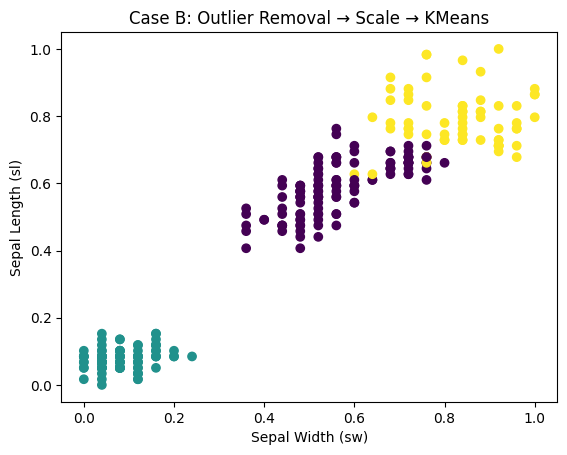

In [ ]:
plt.scatter(scaled_filtered["sw"], scaled_filtered["sl"], c=scaled_filtered["Cluster"], cmap="viridis")
plt.xlabel("Sepal Width (sw)")
plt.ylabel("Sepal Length (sl)")
plt.title("Case B: Outlier Removal → Scale → KMeans")
plt.show()

**Task 3 - Choice of K**

K=2, Davies-Bouldin Index = 0.4629
K=3, Davies-Bouldin Index = 0.7824
K=4, Davies-Bouldin Index = 0.9884
K=5, Davies-Bouldin Index = 1.0524
K=6, Davies-Bouldin Index = 1.0532
K=7, Davies-Bouldin Index = 0.9731
K=8, Davies-Bouldin Index = 1.0312
K=9, Davies-Bouldin Index = 0.9884
K=10, Davies-Bouldin Index = 0.9930

Best K (lowest DBI): 2


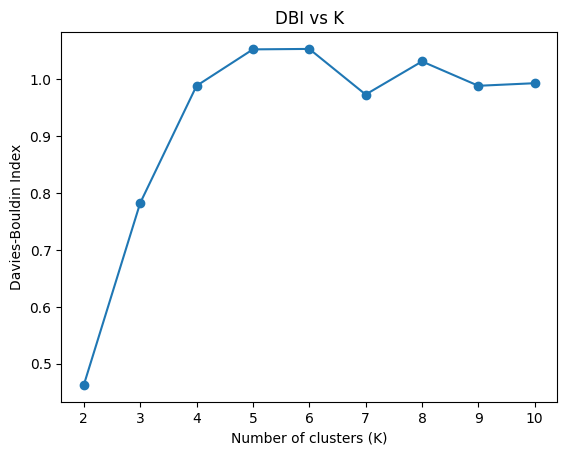

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler


features = filtered.copy()

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

dbi_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)

    dbi = davies_bouldin_score(scaled_features, labels)
    dbi_scores[k] = dbi
    print(f"K={k}, Davies-Bouldin Index = {dbi:.4f}")

best_k = min(dbi_scores, key=dbi_scores.get)
print("\nBest K (lowest DBI):", best_k)

plt.plot(list(dbi_scores.keys()), list(dbi_scores.values()), marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Davies-Bouldin Index")
plt.title("DBI vs K")
plt.show()


**Task 4 Hierarchical clustering(AgglomerativeClustering)**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd

agg = AgglomerativeClustering(n_clusters=2, linkage="single")
labels = agg.fit_predict(scaled_features)

filtered_scaled_df = pd.DataFrame(scaled_features, columns=data.columns)
filtered_scaled_df["Cluster"] = labels

In [ ]:
cluster_counts = filtered_scaled_df["Cluster"].value_counts().sort_index()
print("Number of records in each of the two top clusters:")
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count}")

Number of records in each of the two top clusters:
Cluster 0: 187
Cluster 1: 98


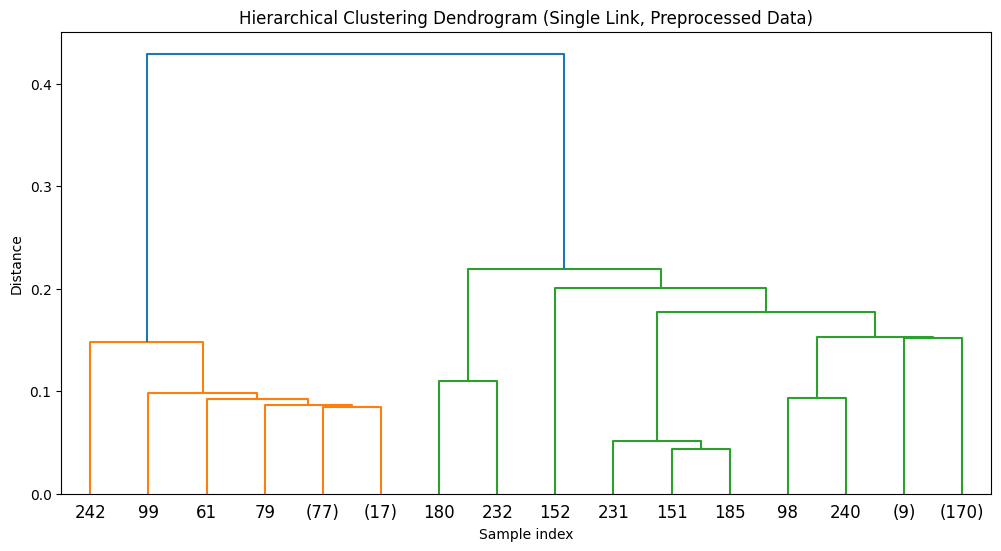

In [ ]:

Z = linkage(scaled_features, method="single")
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (Single Link, Preprocessed Data)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

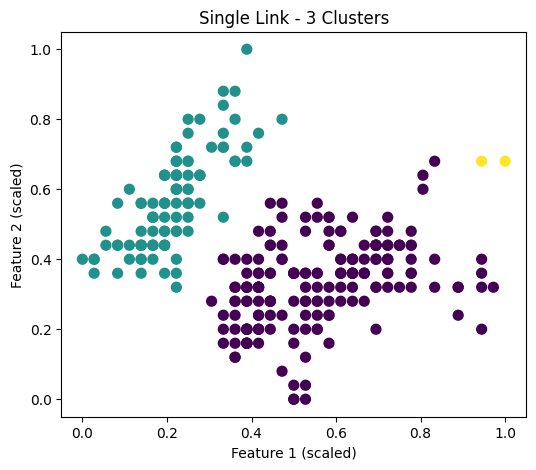

Linkage: Single, Cluster counts: {np.int64(0): np.int64(185), np.int64(1): np.int64(98), np.int64(2): np.int64(2)}


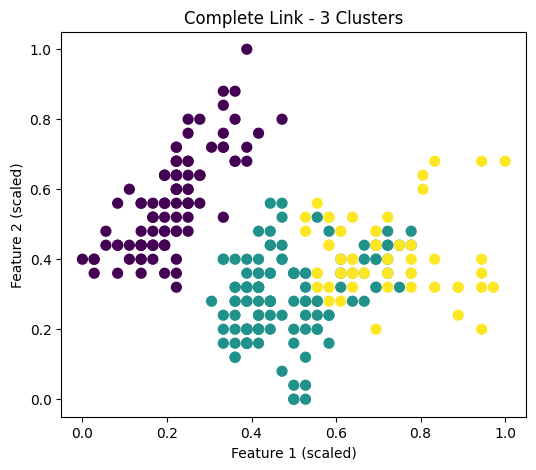

Linkage: Complete, Cluster counts: {np.int64(0): np.int64(98), np.int64(1): np.int64(125), np.int64(2): np.int64(62)}


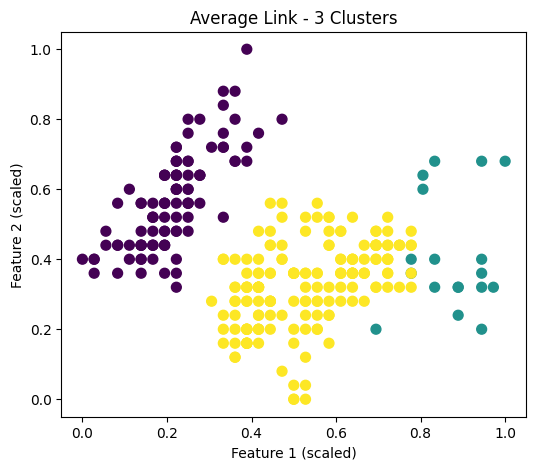

Linkage: Average, Cluster counts: {np.int64(0): np.int64(98), np.int64(1): np.int64(18), np.int64(2): np.int64(169)}


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np

linkages = ["single", "complete", "average"]

for link in linkages:
    agg = AgglomerativeClustering(n_clusters=3, linkage=link)
    labels = agg.fit_predict(scaled_features)

    plt.figure(figsize=(6,5))
    plt.scatter(scaled_features[:,0], scaled_features[:,1], c=labels, cmap="viridis", s=50)
    plt.title(f"{link.capitalize()} Link - 3 Clusters")
    plt.xlabel("Feature 1 (scaled)")
    plt.ylabel("Feature 2 (scaled)")
    plt.show()

    unique, counts = np.unique(labels, return_counts=True)
    print(f"Linkage: {link.capitalize()}, Cluster counts: {dict(zip(unique, counts))}")




**Task 5 - DB-Scan**

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from collections import Counter

dbscan = DBSCAN(eps=1, min_samples=5)
labels = dbscan.fit_predict(scaled_features)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")

cluster_counts = Counter(labels)
print("Cluster counts (including noise as -1):", cluster_counts)


Number of clusters found: 1
Number of noise points: 0
Cluster counts (including noise as -1): Counter({np.int64(0): 285})


In [ ]:
eps_candidate = 0.5
db = DBSCAN(eps=eps_candidate, min_samples=5)
labels = db.fit_predict(scaled_features)

cluster_counts = Counter(labels)
print(f"DBSCAN with eps={eps_candidate}")
print("Cluster counts (including noise=-1):", cluster_counts)

DBSCAN with eps=0.5
Cluster counts (including noise=-1): Counter({np.int64(0): 285})


In [ ]:
eps_candidate = 0.4
db = DBSCAN(eps=eps_candidate, min_samples=5)
labels = db.fit_predict(scaled_features)

cluster_counts = Counter(labels)
print(f"DBSCAN with eps={eps_candidate}")
print("Cluster counts (including noise=-1):", cluster_counts)

DBSCAN with eps=0.4
Cluster counts (including noise=-1): Counter({np.int64(0): 187, np.int64(1): 98})


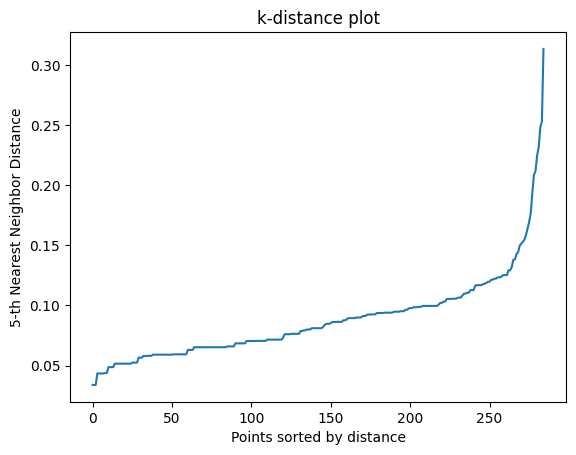

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)

distances_k = np.sort(distances[:, k-1])
plt.plot(distances_k)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.title("k-distance plot")
plt.show()


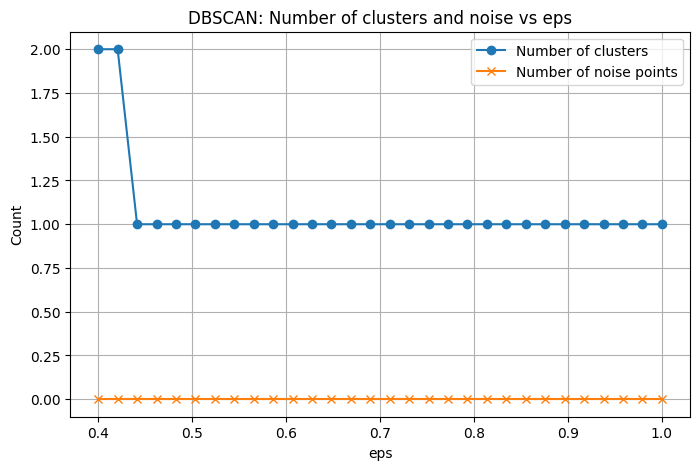

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

eps_values = np.linspace(0.4, 1.0, 30)
num_clusters = []
num_noise = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(scaled_features)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    num_clusters.append(n_clusters)

    n_noise = list(labels).count(-1)
    num_noise.append(n_noise)

plt.figure(figsize=(8,5))
plt.plot(eps_values, num_clusters, marker='o', label='Number of clusters')
plt.plot(eps_values, num_noise, marker='x', label='Number of noise points')
plt.xlabel("eps")
plt.ylabel("Count")
plt.title("DBSCAN: Number of clusters and noise vs eps")
plt.grid(True)
plt.legend()
plt.show()
